pip install statsmodels # instalasi library untuk statistik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, index_col='Month', parse_dates=True)
data.index.freq = 'MS' # Monthly start frequency

In [3]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


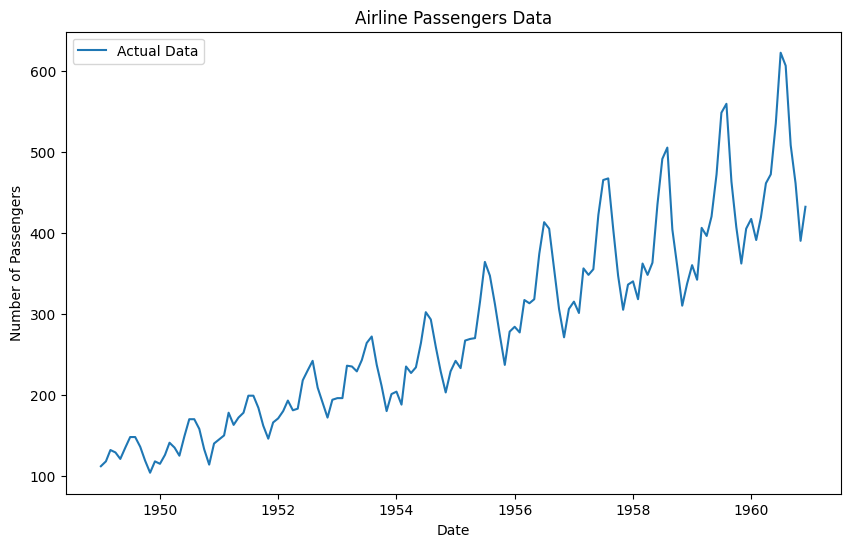

In [5]:
# Plot dataset
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual Data')
plt.title('Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [7]:
# simple moving average (SMA)
data['SMA_12'] = data['Passengers'].rolling(window=12).mean()

# Exponential Smoothing (ETS)
model_ets = ExponentialSmoothing(data['Passengers'], trend = 'add', seasonal='add')
data['ETS'] = model_ets.fit().fittedvalues

# Linear Regression Model for Trend
data['t'] = np.arange(1, len(data)+1)
X = data[['t']]
y = data['Passengers']
model_lr = LinearRegression()
model_lr.fit(X, y)
data['LR'] = model_lr.predict(X)

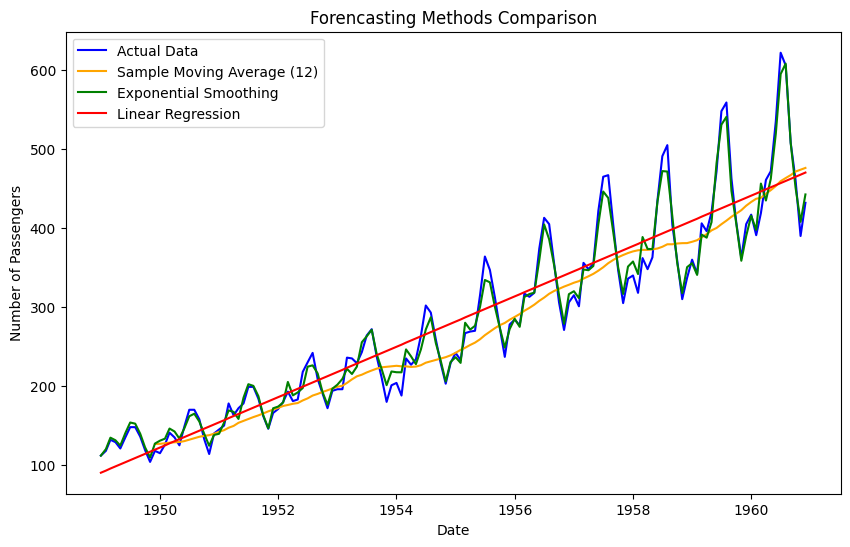

In [8]:
# plotting the result
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Actual Data', color='blue')
plt.plot(data['SMA_12'], label='Sample Moving Average (12)', color='orange')
plt.plot(data['ETS'], label='Exponential Smoothing', color='green')
plt.plot(data['LR'], label='Linear Regression', color='red')
plt.title('Forencasting Methods Comparison')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [11]:
# future forecasting using linear regression
future_periods = 12 # forecast for the next 12 months
future_t = np.arange(len(data) + 1, len(data) + future_periods + 1).reshape(-1, 1)
future_forecast_lr = model_lr.predict(future_t)

# display future predictions
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), peridos=future_periods, freq='MS')
forecast_df = pd.DataFrame({'Forecast_LR': future_forecast_lr}, index=future_dates)
print(forecast_df)


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'peridos'